In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [27]:
heart = pd.read_csv("heart.csv")

In [28]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [37]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   trestbps  303 non-null    int64  
 2   chol      303 non-null    int64  
 3   thalach   303 non-null    int64  
 4   oldpeak   303 non-null    float64
 5   target    303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB


In [39]:
heart.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [29]:
feature_cols = ['age', 'trestbps','chol','thalach','oldpeak']
X = heart[feature_cols]
y = heart.target

In [30]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
#decision tree classification
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6263736263736264


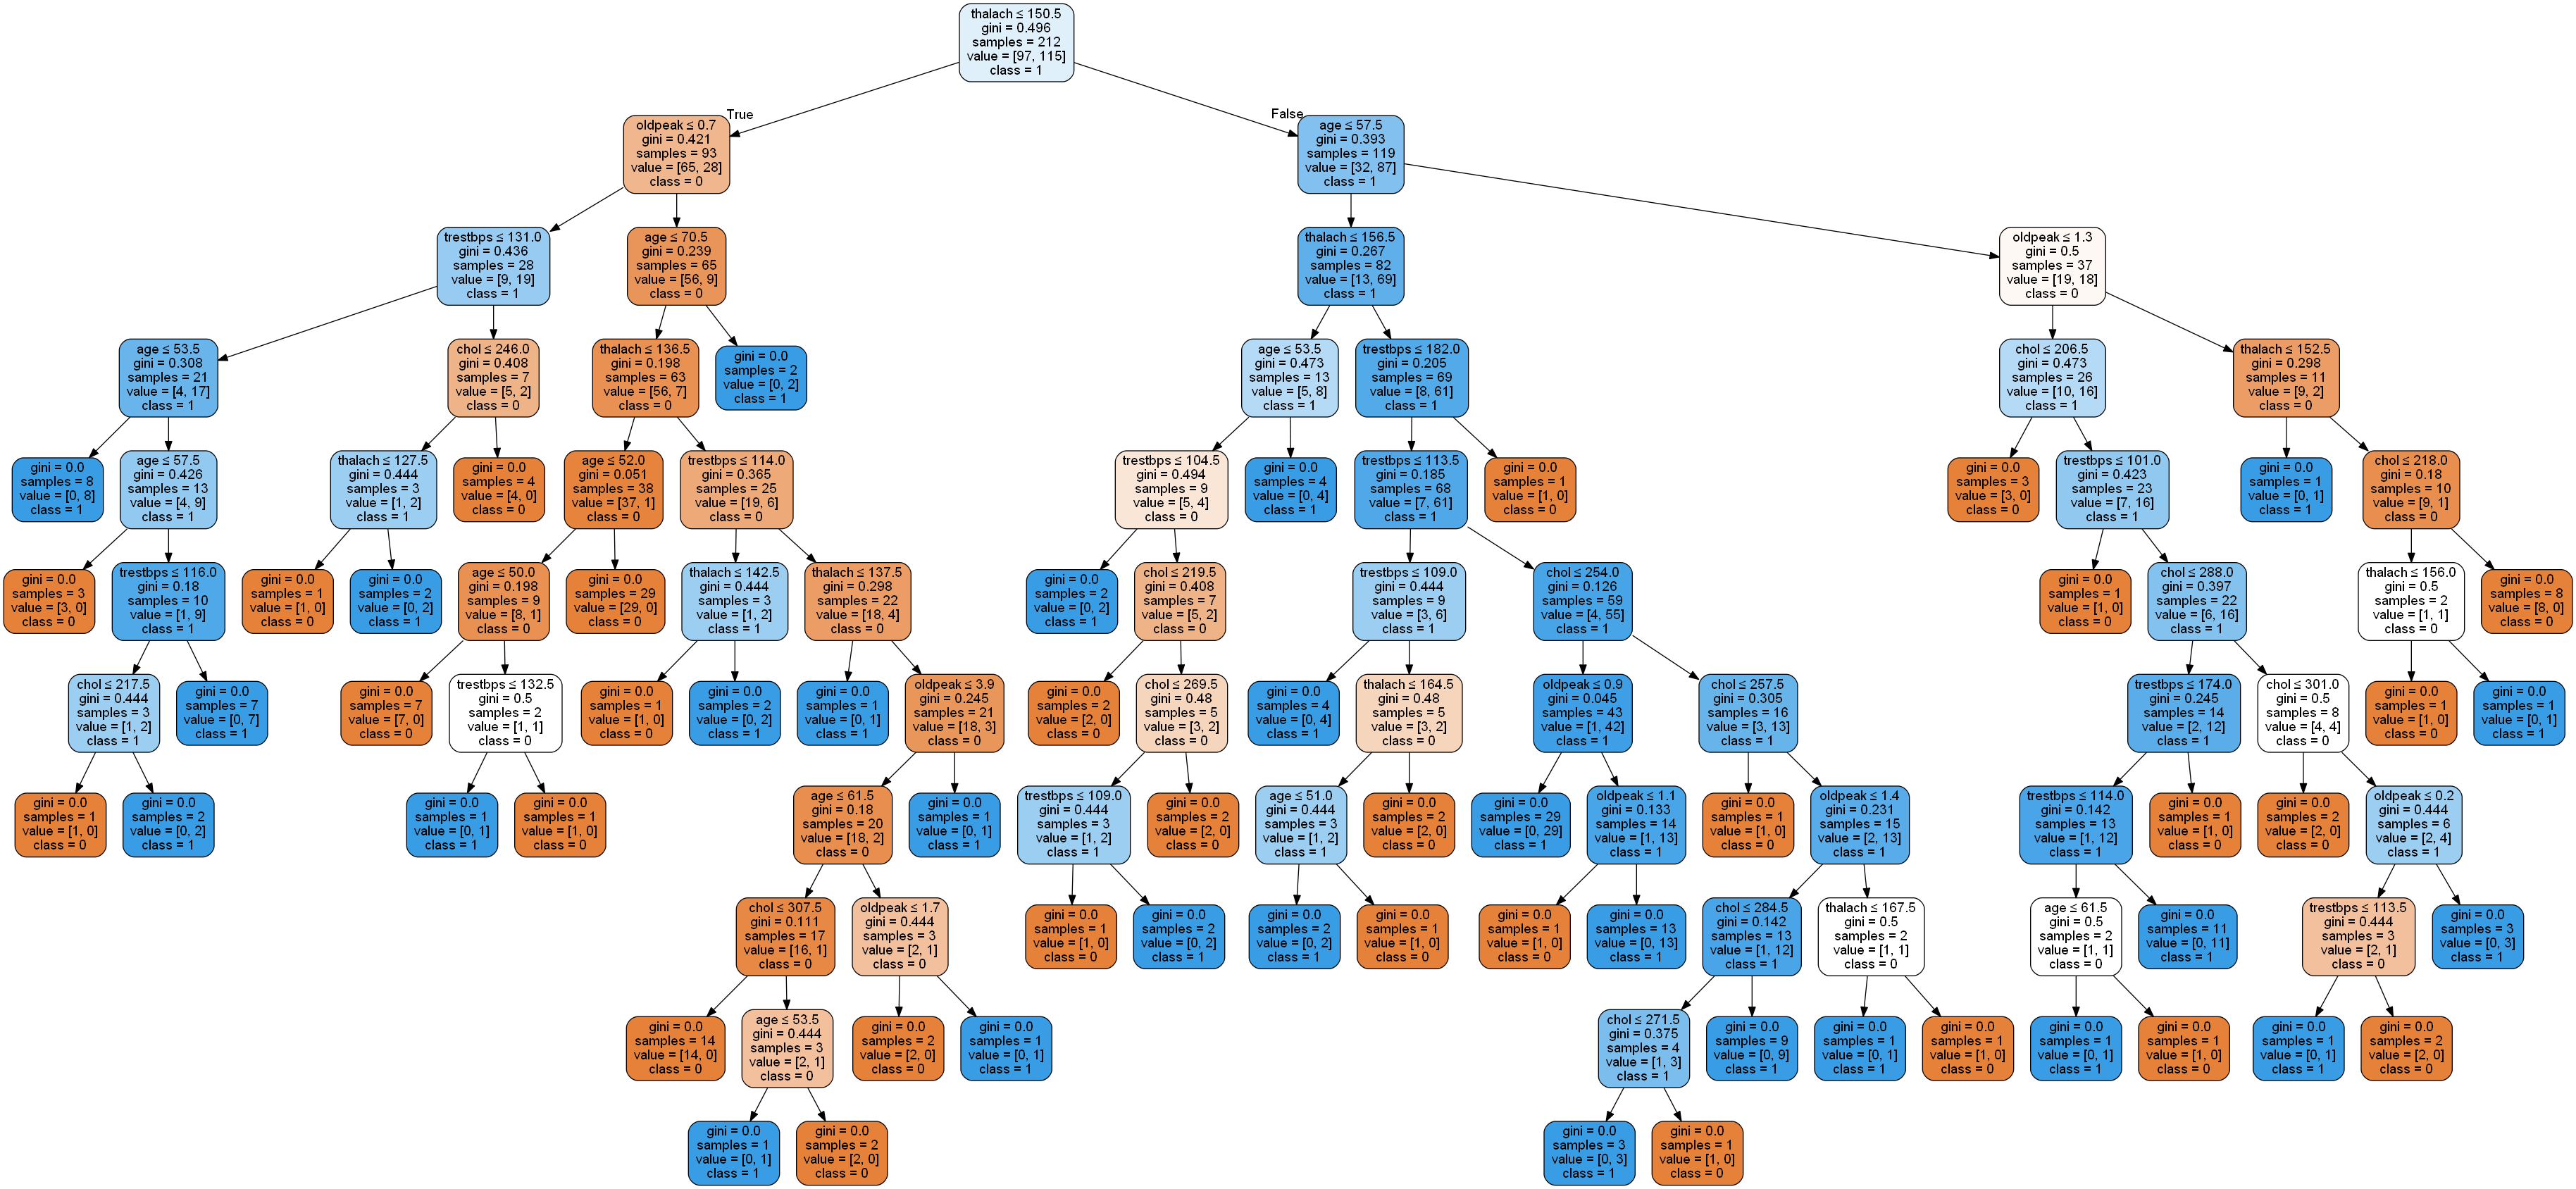

In [32]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())

In [33]:
#finding accuracy using gini index
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7032967032967034


In [34]:
#finding accuracy using entropy
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


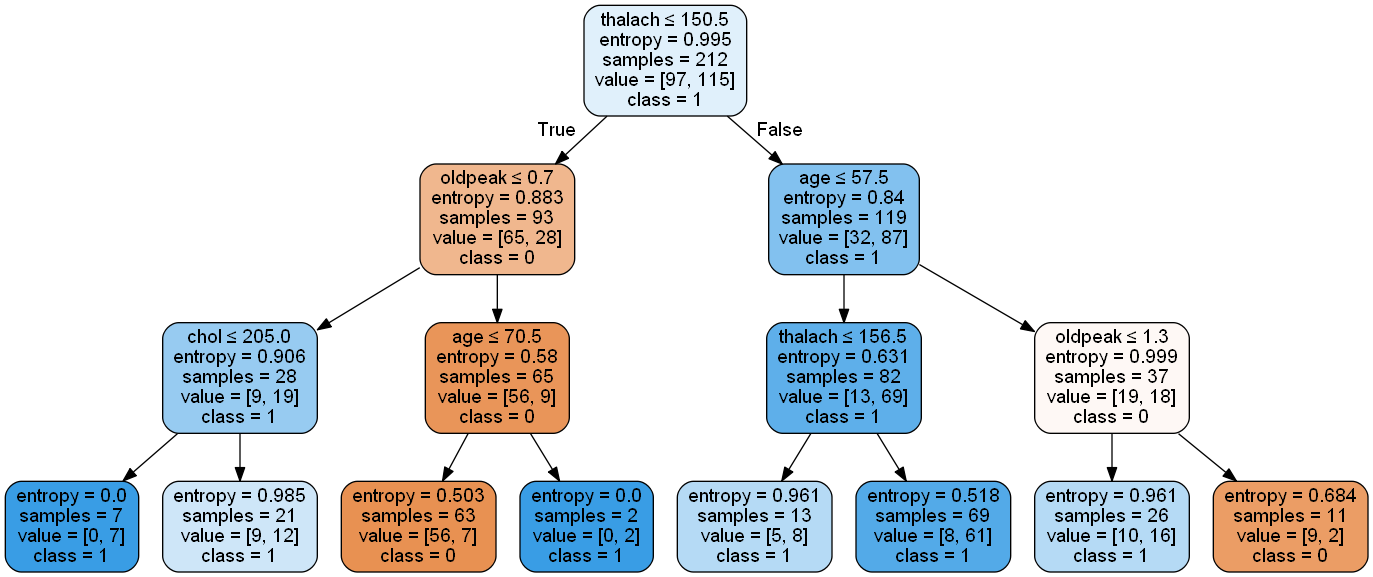

In [35]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())

In [36]:
#confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26 15]
 [10 40]]
              precision    recall  f1-score   support

           0       0.72      0.63      0.68        41
           1       0.73      0.80      0.76        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91

